In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


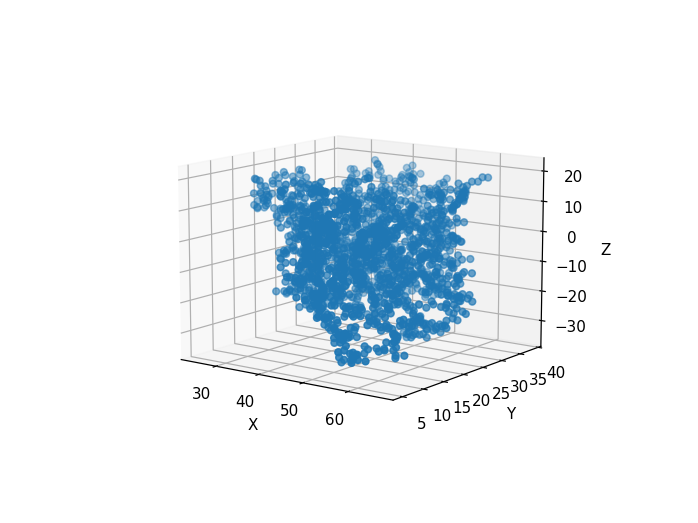

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
class Molecule:
    def __init__(self, file):
        self.file = file
        self.coords = []

    def coordinates(self):
        with open(self.file) as f:
            for i in f.readlines():
                if i.startswith('#'):
                    continue
                self.coords.append((float(i.split()[0]),float(i.split()[1]), float(i.split()[2])))

    def translate(self,t):
            translated = []
            for i in self.coords:
                translated.append(tuple(x+t1 for x,t1 in zip(i,t)))
            del self.coords
            self.coords = translated
            return self.coords


    def graph(self):
        x =[i[0] for i in self.coords]
        y =[i[1] for i in self.coords]
        z =[i[2] for i in self.coords]
        fig_3d = plt.figure()
        fig_3d.add_subplot(1,1,1,projection="3d")
        ax = plt.gca()
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.scatter(x,y,z)
        plt.show()

class Pdb(Molecule):
    def coordinates(self):
        with open(self.file) as f:
            for i in f.readlines():
                if i.startswith('ATOM'):
                    self.coords.append((float(i.split()[6]),float(i.split()[7]),float(i.split()[8])))
                elif i.startswith('TER'):
                    break



def main():
    molecule = Pdb('1fqy.pdb')
    molecule.coordinates()
    molecule.translate((1,2,-1))
    molecule.graph()

if __name__ == "__main__":
    main()
